In [ ]:
import pandas as pd

# Load the dataset (update the filename/path as needed)
df = pd.read_csv('IOT-temp.csv')

# Display the column names and first few rows to inspect the data
print("Dataset Columns:", df.columns)
print("Sample Data:")
print(df.head())


Dataset Columns: Index(['id', 'room_id/id', 'noted_date', 'temp', 'out/in'], dtype='object')
Sample Data:
                                    id  room_id/id        noted_date  temp  \
0  __export__.temp_log_196134_bd201015  Room Admin  08-12-2018 09:30    29   
1  __export__.temp_log_196131_7bca51bc  Room Admin  08-12-2018 09:30    29   
2  __export__.temp_log_196127_522915e3  Room Admin  08-12-2018 09:29    41   
3  __export__.temp_log_196128_be0919cf  Room Admin  08-12-2018 09:29    41   
4  __export__.temp_log_196126_d30b72fb  Room Admin  08-12-2018 09:29    31   

  out/in  
0     In  
1     In  
2    Out  
3    Out  
4     In  


In [ ]:
# Ensure df is defined; df should come from the previous cell.
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size].copy()
test_df  = df.iloc[train_size:].copy()

print(f"Training set: {train_df.shape[0]} rows, Testing set: {test_df.shape[0]} rows")


Training set: 78084 rows, Testing set: 19522 rows


In [ ]:
# Manually specify the column names if needed.
# For example, if your CSV has columns like 'timestamp' and 'temperature', set:
# date_col = 'timestamp'
# temp_col = 'temperature'

# Here we try to guess the date column:
if 'date' in df.columns:
    date_col = 'date'
elif 'Date' in df.columns:
    date_col = 'Date'
elif 'timestamp' in df.columns:
    date_col = 'timestamp'
else:
    # If none of these exist, prompt you to manually set it.
    print("No obvious date column found. Please inspect your columns:")
    print(df.columns)
    date_col = input("Enter the name of the column containing date information: ")

# For temperature, try to pick an appropriate column name:
if 'temperature' in df.columns:
    temp_col = 'temperature'
elif 'Temperature' in df.columns:
    temp_col = 'Temperature'
elif 'temp' in df.columns:
    temp_col = 'temp'
else:
    # If not found, use the second column (adjust as needed)
    temp_col = df.columns[1]
    print(f"Temperature column not found. Defaulting to second column: {temp_col}")


No obvious date column found. Please inspect your columns:
Index(['id', 'room_id/id', 'noted_date', 'temp', 'out/in'], dtype='object')


Enter the name of the column containing date information:  noted_date


In [ ]:
# Print sample date values to check if they look like dates:
print(f"Sample values in '{date_col}':")
print(df[date_col].head())

# Convert the date column to datetime with errors='coerce' to handle unparseable strings
df[date_col] = pd.to_datetime(df[date_col], errors='coerce', infer_datetime_format=True)

# Check for any conversion issues:
if df[date_col].isna().any():
    print("Warning: Some values in the date column could not be parsed and were set to NaT.")
    print(df[df[date_col].isna()].head())
    # Optionally, drop these rows:
    df = df.dropna(subset=[date_col])

# Sort the DataFrame by the date column
df.sort_values(by=date_col, inplace=True)


Sample values in 'noted_date':
0    08-12-2018 09:30
1    08-12-2018 09:30
2    08-12-2018 09:29
3    08-12-2018 09:29
4    08-12-2018 09:29
Name: noted_date, dtype: object


C:\Users\Chiss\AppData\Local\Temp\ipykernel_5592\2157039867.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[date_col] = pd.to_datetime(df[date_col], errors='coerce', infer_datetime_format=True)


                                       id  room_id/id noted_date  temp out/in
7612  __export__.temp_log_171452_ace9cea4  Room Admin        NaT    37    Out
7613  __export__.temp_log_171453_55664bc9  Room Admin        NaT    37    Out
7614  __export__.temp_log_171449_4c50b706  Room Admin        NaT    36    Out
7615  __export__.temp_log_171448_66a79e55  Room Admin        NaT    36    Out
7616  __export__.temp_log_171426_6a649397  Room Admin        NaT    37    Out


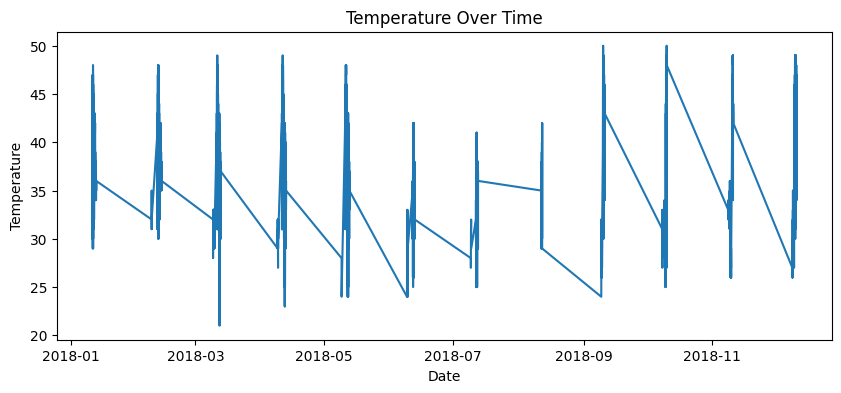

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(df[date_col], df[temp_col])
plt.title("Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()


In [ ]:
# Split the data into 80% training and 20% testing sets, preserving time order
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size].copy()
test_df  = df.iloc[train_size:].copy()

print(f"Training set: {train_df.shape[0]} rows, Testing set: {test_df.shape[0]} rows")


Training set: 39955 rows, Testing set: 9989 rows


In [ ]:
!pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ----------- ---------------------------- 3.9/13.3 MB 21.3 MB/s eta 0:00:01
   --------------------------- ------------ 9.2/13.3 MB 21.9 MB/s eta 0:00:01
   ---------------------------------------  13.1/13.3 MB 21.6 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 17.8 MB/s eta 0:00:00


In [ ]:
pip install --upgrade jupyter ipywidgets



  Using cached fqdn-1.5.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached isoduration-20.11.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached uri_template-1.3.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached webcolors-24.11.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached arrow-1.3.0-py3-none-any.whl.metadata (7.5 kB)
  Using cached types_python_dateutil-2.9.0.20241206-py3-none-any.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 13.2 MB/s eta 0:00:00
Using cached webcolors-24.11.1-py3-none-any.whl (14 kB)
Using cached fqdn-1.5.1-py3-none-any.whl (9.1 kB)
Using cached isoduration-20.11.0-py3-none-any.whl (11 kB)
Using cached uri_template-1.3.0-py3-none-any.whl (11 kB)
Using cached arrow-1.3.0-py3-none-any.whl (66 kB)
Using cached types_python_dateutil-2.9.0.20241206-py3-none-any.whl (14 kB)


In [ ]:
pip install plotly



   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.8 MB 2.8 MB/s eta 0:00:06
   --- ------------------------------------ 1.3/14.8 MB 3.7 MB/s eta 0:00:04
   ------- -------------------------------- 2.6/14.8 MB 4.4 MB/s eta 0:00:03
   ----------- ---------------------------- 4.2/14.8 MB 5.4 MB/s eta 0:00:02
   --------------- ------------------------ 5.8/14.8 MB 5.8 MB/s eta 0:00:02
   ------------------- -------------------- 7.3/14.8 MB 6.2 MB/s eta 0:00:02
   ------------------------- -------------- 9.4/14.8 MB 6.6 MB/s eta 0:00:01
   ------------------------------- -------- 11.5/14.8 MB 7.1 MB/s eta 0:00:01
   ------------------------------------- -- 13.9/14.8 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------  14.7/14.8 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------- 14.8/14.8 MB 7.0 MB/s eta 0:00:00


22:18:14 - cmdstanpy - INFO - Chain [1] start processing
22:22:04 - cmdstanpy - INFO - Chain [1] done processing


NameError: name 'plt' is not defined

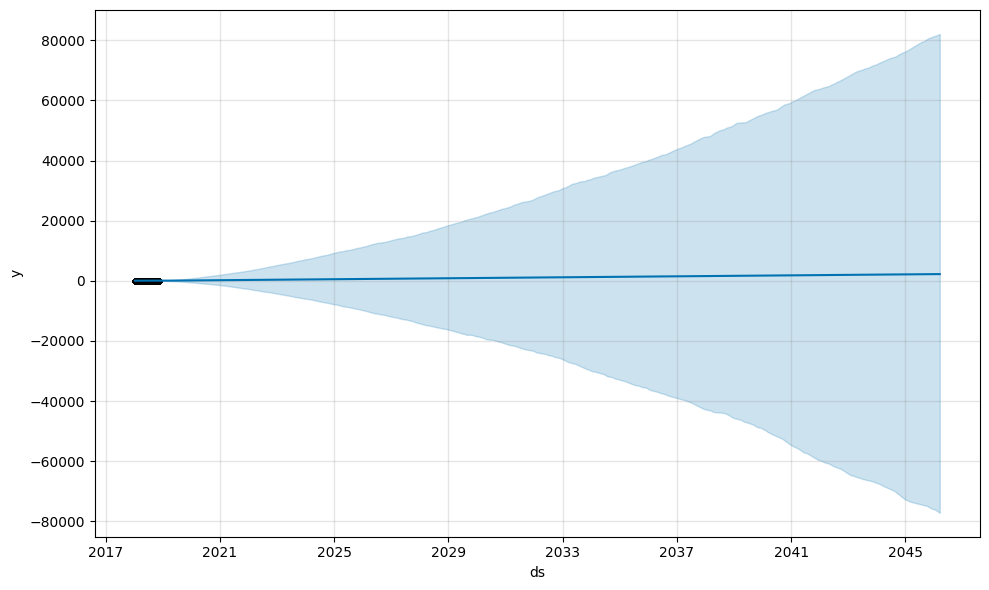

In [ ]:
# Forecasting with Prophet (fallback approach)

# Install Prophet if needed (uncomment the line below if required)
# !pip install prophet

from prophet import Prophet

# Prepare data for Prophet: rename columns to 'ds' for date and 'y' for the target value
prophet_df = train_df[[date_col, temp_col]].rename(columns={date_col: 'ds', temp_col: 'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# Create a future dataframe to forecast ahead for the test set period
future = prophet_model.make_future_dataframe(periods=len(test_df))
forecast_prophet = prophet_model.predict(future)

# Plot the forecast
fig1 = prophet_model.plot(forecast_prophet)
plt.title("Prophet Forecast")
plt.show()

# Display the tail of the forecast for inspection
forecast_tail = forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Prophet Forecast (tail):")
print(forecast_tail)


In [ ]:
# Create custom features on the original DataFrame

# Example: add lag features and a rolling average feature
df['lag_1'] = df[temp_col].shift(1)
df['lag_7'] = df[temp_col].shift(7)
df['rolling_mean_3'] = df[temp_col].rolling(window=3).mean()

# Drop rows with NaN values generated by these new features
df_featured = df.dropna().copy()

print("Data after Feature Engineering:")
print(df_featured.head())


Data after Feature Engineering:
                                        id  room_id/id          noted_date  \
16211  __export__.temp_log_129490_87ad9555  Room Admin 2018-01-11 00:33:00   
16210  __export__.temp_log_132487_2d78b984  Room Admin 2018-01-11 00:37:00   
16209  __export__.temp_log_141401_b33d14f3  Room Admin 2018-01-11 00:41:00   
16208  __export__.temp_log_120778_92b863ed  Room Admin 2018-01-11 00:43:00   
16207  __export__.temp_log_150726_42853e3f  Room Admin 2018-01-11 00:45:00   

       temp out/in  lag_1  lag_7  rolling_mean_3  
16211    40    Out   41.0   32.0       40.333333  
16210    39    Out   40.0   40.0       40.000000  
16209    41    Out   39.0   39.0       40.000000  
16208    40    Out   41.0   40.0       40.000000  
16207    41    Out   40.0   40.0       40.666667  


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# We will evaluate the Prophet forecast.
# Prophet produces forecasts for all dates (train and test). We extract the forecast for the test period.

# Get the test dates from test_df (normalize dates to ensure matching)
test_dates = test_df[date_col].dt.normalize().unique()

# Filter Prophet forecast for test dates
forecast_test = forecast_prophet[forecast_prophet['ds'].dt.normalize().isin(test_dates)]

# Merge actual test values with forecast on the date column
merged = pd.merge(test_df, forecast_test, left_on=date_col, right_on='ds', how='inner')

# Calculate evaluation metrics using actual temperature and forecast ('yhat')
mae = mean_absolute_error(merged[temp_col], merged['yhat'])
mse = mean_squared_error(merged[temp_col], merged['yhat'])

print("Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


Evaluation Metrics:
Mean Absolute Error (MAE): 1.1564497137668635
Mean Squared Error (MSE): 1.5595981626936826


In [ ]:
import numpy as np


In [ ]:
import numpy as np  # Ensure NumPy is imported
import tensorflow as tf
from tensorflow.keras import layers, Model, backend as K

# Prepare the data for the VAE: use temperature values from the original DataFrame.
# Convert the temperature column to float32 and normalize.
data_values = df[[temp_col]].values.astype('float32')
data_mean = np.mean(data_values)
data_std = np.std(data_values)
data_norm = (data_values - data_mean) / data_std

input_dim = data_norm.shape[1]
latent_dim = 2  # Dimension of the latent space

# Define the encoder
inputs = layers.Input(shape=(input_dim,))
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(32, activation='relu')(x)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.random.normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

# Define the decoder
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(32, activation='relu')(latent_inputs)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(input_dim, activation='linear')(x)  # 'linear' activation for regression
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

# Define the VAE model by connecting encoder and decoder
vae_outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, vae_outputs, name='vae')

# Define the losses using Keras backend functions (which work on symbolic tensors)
# Reconstruction loss: mean squared error between inputs and outputs.
reconstruction_loss = K.mean(K.square(inputs - vae_outputs)) * input_dim

# KL divergence loss
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.mean(kl_loss) * -0.5

# Total VAE loss
vae_loss = reconstruction_loss + kl_loss
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')
vae.summary()

# Train the VAE on the normalized data
vae.fit(data_norm, data_norm, epochs=50, batch_size=32)

# Generate synthetic data by sampling from the latent space
num_samples = 100  # Number of synthetic samples to generate
latent_samples = np.random.normal(size=(num_samples, latent_dim))
synthetic_data_norm = decoder.predict(latent_samples)

# Denormalize the synthetic data
synthetic_data = synthetic_data_norm * data_std + data_mean

print("Synthetic Data Generated by the VAE (first 10 samples):")
print(synthetic_data[:10])


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 64)        │        128 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 32)        │      2,080 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 2)         │         66 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 2)         │         66 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 2)         │          0 │ dense_9[0][0],    │
│                     │                   │            │ dense_10[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,340 (9.14 KB)

 Trainable params: 2,340 (9.14 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,273 (8.88 KB)

 Trainable params: 2,273 (8.88 KB)

 Non-trainable params: 0 (0.00 B)

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.ops`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```
